In [1]:

#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     |████████████████████████████████| 720 kB 15.9 MB/s 
     |████████████████████████████████| 1.2 MB 24.8 MB/s 
     |████████████████████████████████| 188 kB 61.3 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 51 kB 292 kB/s 
Mounted at /content/gdrive


In [2]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     |████████████████████████████████| 1.6 MB 12.7 MB/s 
     |████████████████████████████████| 112 kB 64.3 MB/s 
     |████████████████████████████████| 392 kB 56.6 MB/s 
     |████████████████████████████████| 551 kB 53.4 MB/s 
     |████████████████████████████████| 428 kB 53.2 MB/s 
     |████████████████████████████████| 77 kB 5.6 MB/s 
     |████████████████████████████████| 68 kB 6.4 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that ar

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [5]:
key = os.environ.get('AZURE_SEARCH_KEY', 'f26af8745c6747fc8f01b487c5737c62')

In [6]:
search_images_bing

<function fastbook.search_images_bing>

In [7]:
results = search_images_bing(key, 'snus')
ims = results.attrgot('content_url')
len(ims)

150

In [8]:
#hide
ims = ['https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Portioned_snus.jpg/330px-Portioned_snus.jpg']

In [9]:
dest = '/330px-Portioned_snus.jpg'
download_url(ims[0], dest)

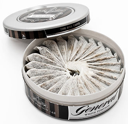

In [10]:
im = Image.open(dest)
im.to_thumb(128,128)

In [11]:
snus_types = 'nicotine pouches','snus'
path = Path('snus')

In [12]:
if not path.exists():
    path.mkdir()
    for o in snus_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} snus')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [13]:
fns = get_image_files(path)
fns

(#300) [Path('snus/snus/00000039.jpg'),Path('snus/snus/00000001.jpg'),Path('snus/snus/00000119.jpg'),Path('snus/snus/00000078.jpg'),Path('snus/snus/00000041.JPG'),Path('snus/snus/00000141.jpg'),Path('snus/snus/00000137.jpg'),Path('snus/snus/00000073.png'),Path('snus/snus/00000054.jpg'),Path('snus/snus/00000061.jpg')...]

In [14]:
failed = verify_images(fns)
failed

(#12) [Path('snus/snus/00000056.jpg'),Path('snus/snus/00000129.jpg'),Path('snus/snus/00000087.jpg'),Path('snus/snus/00000046.jpg'),Path('snus/snus/00000080.jpg'),Path('snus/snus/00000143.png'),Path('snus/nicotine pouches/00000115.jpeg'),Path('snus/nicotine pouches/00000062.jpg'),Path('snus/nicotine pouches/00000056.jpg'),Path('snus/nicotine pouches/00000050.JPG')...]

In [15]:
failed.map(Path.unlink);

In [16]:
snus = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [17]:
dls = snus.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


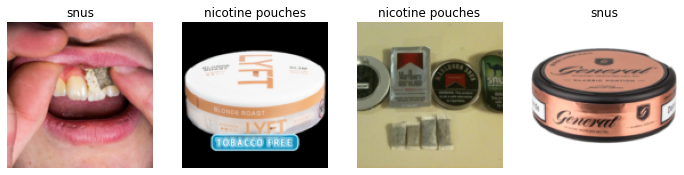

In [18]:
dls.valid.show_batch(max_n=4, nrows=1)

In [19]:
cat = snus.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = cat.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


In [20]:

learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.426181,1.078759,0.438596,00:37


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,1.082435,0.618024,0.263158,00:48
1,0.904358,0.478218,0.228070,00:48
2,0.812359,0.596626,0.298246,00:47
3,0.699193,0.634390,0.298246,00:46
4,0.639670,0.617907,0.245614,00:48


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


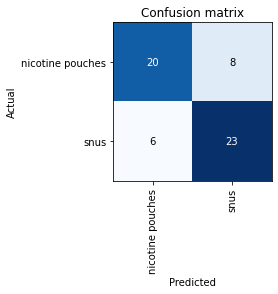

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

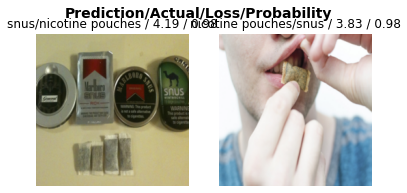

In [65]:
interp.plot_top_losses(2, nrows=1)

In [66]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


FileNotFoundError: ignored

In [68]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,snus in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

FileNotFoundError: ignored

In [69]:
learn.export()

In [70]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [71]:
learn_inf = load_learner(path/'export.pkl')

In [72]:
learn_inf.predict('/330px-Portioned_snus.jpg')

('snus', tensor(1), tensor([0.0487, 0.9513]))

In [73]:
learn_inf.dls.vocab

['nicotine pouches', 'snus']

In [74]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [75]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['/330px-Portioned_snus.jpg'])

In [76]:
img = PILImage.create(btn_upload.data[-1])

In [77]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [78]:
pred,pred_idx,probs = learn_inf.predict(img)

In [79]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: snus; Probability: 0.9513')

In [80]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [81]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [82]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [83]:
#hide_output
VBox([widgets.Label('Select your snus!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [84]:
learn.export()